In [ ]:
#  Exploratory Data Analysis – Benin
This notebook performs profiling, cleaning, and visualization for the **Benin solar dataset** as part of 10 Academy Week-0 Task 2.

In [ ]:
# Import Libraries inspect the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("../data/benin-malanville.csv")
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
GHI,525600.0,240.559452,331.131327,-12.9,-2.0,1.8,483.4,1413.0
DNI,525600.0,167.187516,261.710501,-7.8,-0.5,-0.1,314.2,952.3
DHI,525600.0,115.358961,158.691074,-12.6,-2.1,1.6,216.3,759.2
ModA,525600.0,236.589496,326.894859,0.0,0.0,4.5,463.7,1342.3
ModB,525600.0,228.883576,316.536515,0.0,0.0,4.3,447.9,1342.3
Tamb,525600.0,28.179683,5.924297,11.0,24.2,28.0,32.3,43.8
RH,525600.0,54.487969,28.073069,2.1,28.8,55.1,80.1,100.0
WS,525600.0,2.121113,1.603466,0.0,1.0,1.9,3.1,19.5
WSgust,525600.0,2.809195,2.029120,0.0,1.3,2.6,4.1,26.6
WSstdev,525600.0,0.473390,0.273395,0.0,0.4,0.5,0.6,4.2


In [ ]:
import numpy as np

# 1. Drop the empty column
df = df.drop(columns=["Comments"])

# 2. Fix negative solar values
irr_cols = ["GHI", "DNI", "DHI"]
for col in irr_cols:
    df.loc[df[col] < 0, col] = np.nan  # mark as missing

# 3. Fill those missing spots with the median value
df[irr_cols] = df[irr_cols].fillna(df[irr_cols].median())




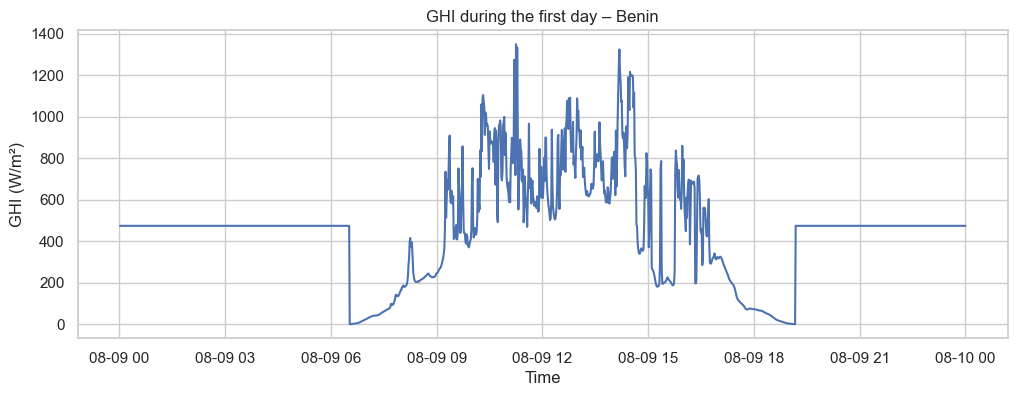

In [ ]:
# Solar Radiation over Time
import matplotlib.pyplot as plt

df["Timestamp"] = pd.to_datetime(df["Timestamp"])
plt.figure(figsize=(12,4))
plt.plot(df["Timestamp"][:1440], df["GHI"][:1440])
plt.title("GHI during the first day – Benin")
plt.xlabel("Time")
plt.ylabel("GHI (W/m²)")
plt.show()
#This plot shows how solar radiation (GHI) changes over time — here, 
# just the first day (1,440 minutes = 24 hours).

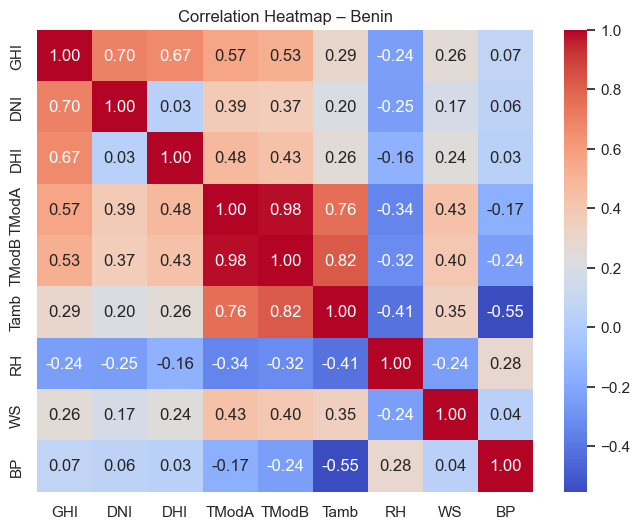

In [ ]:
#Correlation Heatmap

corr_cols = ["GHI","DNI","DHI","TModA","TModB","Tamb","RH","WS","BP"]
plt.figure(figsize=(8,6))
sns.heatmap(df[corr_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap – Benin")
plt.show()
#This plot shows correlation coefficients between variables, with colors indicating strength and direction.
#Close to +1 → strong positive correlation
#Close to -1 → strong negative correlation

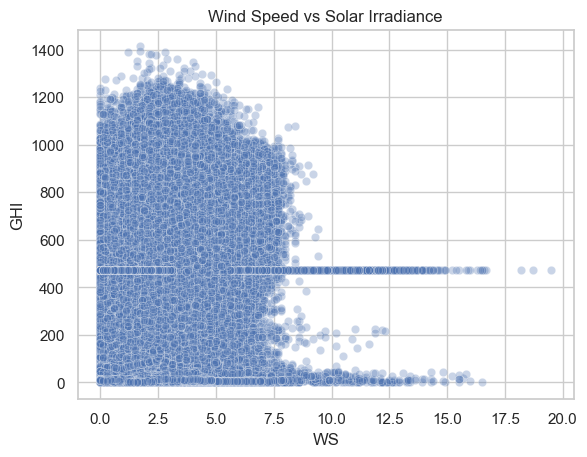

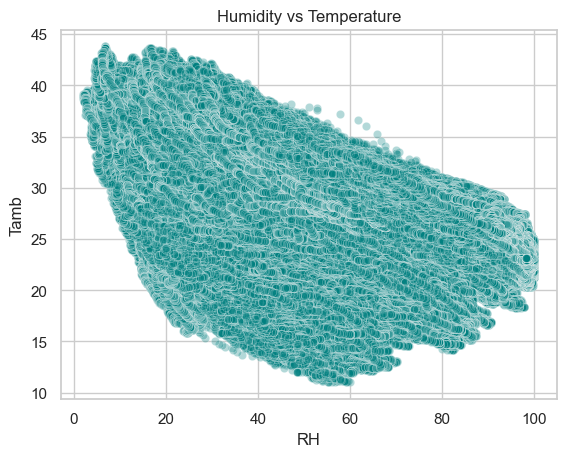

In [ ]:
#Scatter plot
# Wind vs Solar Irradiance
sns.scatterplot(x="WS", y="GHI", data=df, alpha=0.3)
plt.title("Wind Speed vs Solar Irradiance")
plt.show()

# Humidity vs Temperature
sns.scatterplot(x="RH", y="Tamb", data=df, alpha=0.3, color='teal')
plt.title("Humidity vs Temperature")
plt.show()

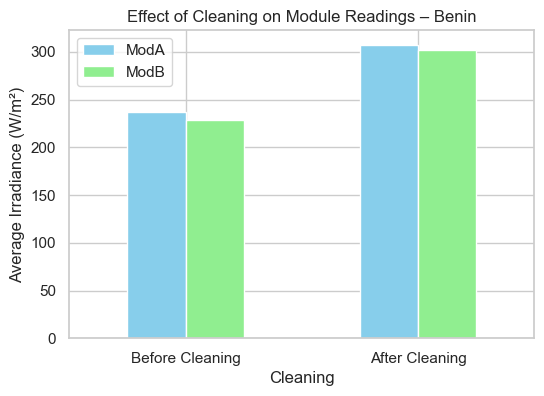

In [ ]:

#Cleaning effect on modules
cleaning_effect = df.groupby("Cleaning")[["ModA","ModB"]].mean()
cleaning_effect.plot(kind="bar", color=["skyblue","lightgreen"], figsize=(6,4))
plt.title("Effect of Cleaning on Module Readings – Benin")
plt.ylabel("Average Irradiance (W/m²)")
plt.xticks([0,1], labels=["Before Cleaning","After Cleaning"], rotation=0)
plt.show()
#This plot shows the average irradiance (GHI) before and after cleaning, with different colors for each module.
#ModA shows a clear improvement after cleaning, while ModB shows a small increase.

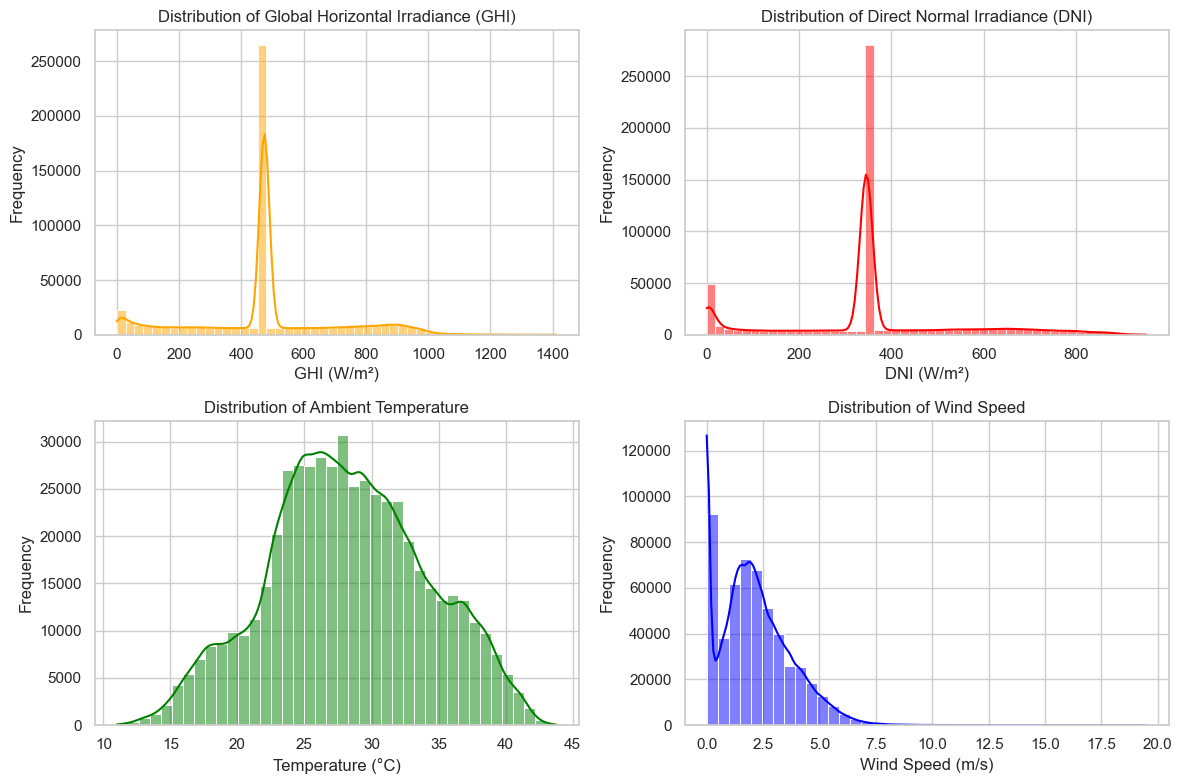

In [ ]:
#distribution
import matplotlib.pyplot as plt
import seaborn as sns

# Set consistent style
sns.set(style="whitegrid")

# Create multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(12,8))

# --- 1️⃣ Solar Radiation Distributions ---
sns.histplot(df["GHI"], bins=50, kde=True, color='orange', ax=axes[0,0])
axes[0,0].set_title("Distribution of Global Horizontal Irradiance (GHI)")
axes[0,0].set_xlabel("GHI (W/m²)")
axes[0,0].set_ylabel("Frequency")

sns.histplot(df["DNI"], bins=50, kde=True, color='red', ax=axes[0,1])
axes[0,1].set_title("Distribution of Direct Normal Irradiance (DNI)")
axes[0,1].set_xlabel("DNI (W/m²)")
axes[0,1].set_ylabel("Frequency")

# --- 2️⃣ Temperature and Wind Speed ---
sns.histplot(df["Tamb"], bins=40, kde=True, color='green', ax=axes[1,0])
axes[1,0].set_title("Distribution of Ambient Temperature")
axes[1,0].set_xlabel("Temperature (°C)")
axes[1,0].set_ylabel("Frequency")

sns.histplot(df["WS"], bins=40, kde=True, color='blue', ax=axes[1,1])
axes[1,1].set_title("Distribution of Wind Speed")
axes[1,1].set_xlabel("Wind Speed (m/s)")
axes[1,1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


#This plot shows the distribution of GHI and wind speed, with kernel density estimates (KDE) for smooth curves.


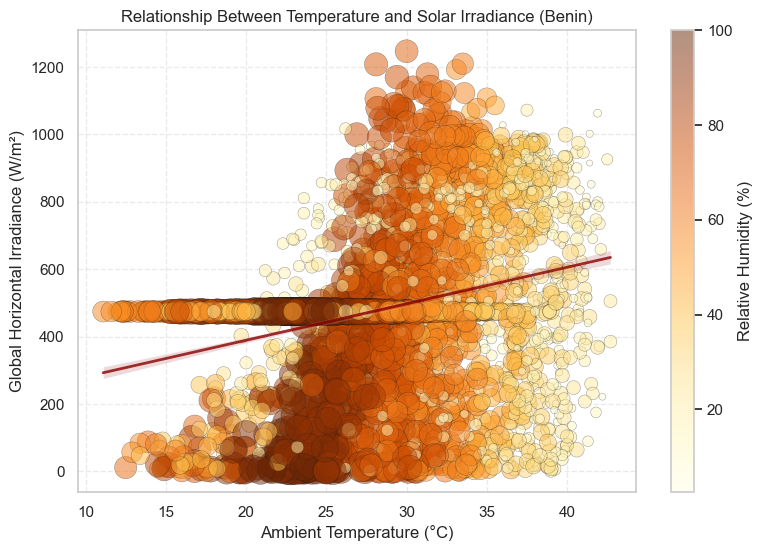

In [ ]:
#Temprature vs GHI Humidity
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Sample data (avoid 500k points)
sample_df = df.sample(n=5000, random_state=42)  # pick 5000 random points

# 2️⃣ Plot scatter with scaled bubbles and color map
plt.figure(figsize=(9,6))
scatter = plt.scatter(
    sample_df["Tamb"],
    sample_df["GHI"],
    s=sample_df["RH"] * 4,        # scale bubble size
    c=sample_df["RH"],            # color = humidity
    cmap="YlOrBr",                # yellow → orange → brown
    alpha=0.5,
    edgecolors='k',
    linewidth=0.3
)

# 3️⃣ Add trend line (regression curve)
sns.regplot(
    x="Tamb",
    y="GHI",
    data=sample_df,
    scatter=False,
    color="darkred",
    line_kws={"linewidth":2, "alpha":0.8}
)

# 4️⃣ Decorate chart
plt.title("Relationship Between Temperature and Solar Irradiance (Benin)")
plt.xlabel("Ambient Temperature (°C)")
plt.ylabel("Global Horizontal Irradiance (W/m²)")
plt.colorbar(scatter, label="Relative Humidity (%)")
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()

#This plot shows how GHI changes with temperature, with bubble sizes representing relative humidity (RH).


## Summary of Benin EDA Insights

- The dataset spans one full year of minute-level measurements.
- Solar irradiance values follow a realistic daily cycle, peaking at midday.
- Negative values were cleaned; no major missing data remains.
- Correlation shows strong relationships among irradiance and temperature.
- Cleaning events slightly improve module readings (ModA & ModB).
- Wind speeds are generally low; humidity affects sunlight penetration.
- Dataset is now clean and ready for cross-country comparison.

In [ ]:
df.to_csv("../data/benin_clean.csv", index=False)
print("✅ Cleaned Benin dataset saved successfully.")


✅ Cleaned Benin dataset saved successfully.
